
# Paris Ratchet - Temperature Plot

The emissions trajectories produced in the previous script (script3_magiccprep) are then ran in MAGICC. We here use the online server version of MAGICC, accessible at https://live.magicc.org/. Scenarios are run 100 times to infer probabilistic outcomes.

This script takes the resultant downloaded data from MAGICC and plots it.


In [1]:
# import libraries
import pandas as pd
import numpy as np


#plot setting
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
sns.set()
sns.set_palette('colorblind')
sns.set_style(style='ticks')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

mm = 1/25.4  # millimetres in inches

SNS_COLOURS = sns.color_palette().as_hex()
SNS_COLOURS = [SNS_COLOURS[-1]]+SNS_COLOURS[:-1]
sns.set_palette(SNS_COLOURS)

In [2]:
#Load aggregate emissions data
future_ghg_gr = pd.read_csv('./Silicone/silicone_inputs/ratcheted_emissions_gr.csv', header=[0,1],index_col=0)
future_ghg_gr_abs = pd.read_csv('./Silicone/silicone_inputs/ratcheted_emissions_gr_abs.csv', header=[0,1],index_col=0)
future_ghg_abs = pd.read_csv('./Silicone/silicone_inputs/ratcheted_emissions_abs.csv', header=[0,1],index_col=0)


In [3]:
#Load disaggregated emissions data
ghg_disagg_gr = pd.read_csv('./Silicone/silicone_outputs/decomposed_emissions_gr.csv')
ghg_disagg_gr_abs = pd.read_csv('./Silicone/silicone_outputs/decomposed_emissions_gr_abs.csv')
ghg_disagg_abs = pd.read_csv('./Silicone/silicone_outputs/decomposed_emissions_abs.csv')

In [4]:
#Load outcomes from MAGICC

#Percentage Rate Approach
magicc_ndc_strength1_gr= pd.read_csv(
    './magicc_temperatures/magicc_temp_strength1_ndc_gr.csv')
magicc_ndc_strength2_gr = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength2_ndc_gr.csv')
magicc_ndc_strength3_gr = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength3_ndc_gr.csv')
magicc_ndc_strength4_gr = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength4_ndc_gr.csv')


#Absolute Rate Approach
magicc_ndc_strength1_gr_abs= pd.read_csv(
    './magicc_temperatures/magicc_temp_strength1_ndc_gr_abs.csv')
magicc_ndc_strength2_gr_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength2_ndc_gr_abs.csv')
magicc_ndc_strength3_gr_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength3_ndc_gr_abs.csv')
magicc_ndc_strength4_gr_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength4_ndc_gr_abs.csv')


#Absolute Emissions Approach
magicc_ndc_strength1_abs= pd.read_csv(
    './magicc_temperatures/magicc_temp_strength1_ndc_abs.csv')
magicc_ndc_strength2_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength2_ndc_abs.csv')
magicc_ndc_strength3_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength3_ndc_abs.csv')
magicc_ndc_strength4_abs = pd.read_csv(
    './magicc_temperatures/magicc_temp_strength4_ndc_abs.csv')


In [5]:
#Exceedence probabilities from MAGICC
exceed_prob_2C = [19,10,6,4,14,6,4,3,22,13,8,6]
exceed_prob_15C = [79,64,56,47,78,58,53,45,83,72,62,59]

exceed_prob=pd.DataFrame([exceed_prob_15C,exceed_prob_2C]).T
exceed_prob.columns=['1.5C','2C']
exceed_prob.insert(0,'ratchet_strength',['1','2','3','4']*3)
exceed_prob.insert(0,'ratchet_def',['gr_%']*4+['gr_abs']*4+['abs']*4)



success_prob=exceed_prob.pivot(index='ratchet_def',columns='ratchet_strength')
success_prob.columns=pd.MultiIndex.from_tuples(
success_prob.columns,names=['temp_target','ratchet_strength'])

success_prob = 100-success_prob

## Plot emissions and temperature outcomes
This function takes data from MAGICC and emissions data, and plots it

In [18]:
def temp_plot(ratchet_type):
    if ratchet_type == 'gr_%':
        df_emissions=future_ghg_gr
        df_disagg=ghg_disagg_gr
        temp_strength1=magicc_ndc_strength1_gr
        temp_strength2=magicc_ndc_strength2_gr
        temp_strength3=magicc_ndc_strength3_gr
        temp_strength4=magicc_ndc_strength4_gr
            
        
    if ratchet_type == 'gr_abs':
        df_emissions=future_ghg_gr_abs
        df_disagg=ghg_disagg_gr_abs
        temp_strength1=magicc_ndc_strength1_gr_abs
        temp_strength2=magicc_ndc_strength2_gr_abs
        temp_strength3=magicc_ndc_strength3_gr_abs
        temp_strength4=magicc_ndc_strength4_gr_abs
        
    if ratchet_type == 'abs':
        df_emissions=future_ghg_abs
        df_disagg=ghg_disagg_abs
        temp_strength1=magicc_ndc_strength1_abs
        temp_strength2=magicc_ndc_strength2_abs
        temp_strength3=magicc_ndc_strength3_abs
        temp_strength4=magicc_ndc_strength4_abs
        

    fig3 = plt.figure(constrained_layout=False, figsize=(200*mm,210*mm))
    
    gs = fig3.add_gridspec(4, 4)
    fig3_axA = fig3.add_subplot(gs[:2,:2])
    fig3_axB = fig3.add_subplot(gs[0,2])
    fig3_axC = fig3.add_subplot(gs[0, 3])
    fig3_axD = fig3.add_subplot(gs[1, 2])
    fig3_axE = fig3.add_subplot(gs[1, 3])
    fig3_axF = fig3.add_subplot(gs[2:, :2])
    fig3_axG = fig3.add_subplot(gs[2:, 2:])
    
   
    
    plt.sca(fig3_axA)
    fig3_axA.plot(df_emissions.index,df_emissions[('paris_ratchet','ratchet_ndc')])
    fig3_axA.plot(df_emissions.index,df_emissions[('paris_ratchet','2ratchet_ndc')])
    fig3_axA.plot(df_emissions.index,df_emissions[('paris_ratchet','3ratchet_ndc')])
    fig3_axA.plot(df_emissions.index,df_emissions[('paris_ratchet','4ratchet_ndc')])
    
    fig3_axA.plot(df_emissions.index[:11],
                  df_emissions[('paris_ratchet','4ratchet_ndc')][:2020.0],color='k')
    
    fig3_axA.set_xlim([2000,2100])
    fig3_axA.set_xlabel('$Year$',size=9)
    fig3_axA.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axA.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=9)
    
    
    
    fig3_axA.set_ylabel('$Greenhouse\/Gas\/Emissions$'+'\n'+
                  '$(GtCO_{2}eq/y)$',size=9)
    fig3_axA.set_yticks([0,10,20,30,40,50])
    fig3_axA.set_yticklabels([0,10,20,30,40,50],fontsize=9)
    
    fig3_axA.set_title('$\mathbf{GHG\/emissions\/under\/the\/Paris\/ratchet}$' + '\n' +
                       '$\mathit{Increasing\/ratchet\/strength}$',fontsize=9)
    
    fig3_axA.legend(['$Default\/ratchet\/strength$',
                '$2x\/ratchet\/strength$',
                '$3x\/ratchet\/strength$',
                '$4x\/ratchet\/strength$'],
                fontsize=8)
    fig3_axA.axhline(y=0, color='k', linewidth=0.75)
    fig3_axA.text(0.0, 1.05, 'A', transform=fig3_axA.transAxes, 
                size=8, weight='bold')
    
    
    
    
    plt.sca(fig3_axB)
    for scen in ['ratchet_ndc','2ratchet_ndc',
                 '3ratchet_ndc','4ratchet_ndc']:
        fig3_axB.plot(np.linspace(2020,2100,9),
            df_disagg[(df_disagg.Variable=='Emissions|CO2')&
                          (df_disagg.Scenario==scen)
                          ].iloc[0,5:]/1e3)
        
    fig3_axB.set_xlabel('$Year$',size=8)
    fig3_axB.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axB.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=7)
    
    
    fig3_axB.set_ylabel('$CO_{2}\/Emissions\/(GtCO_{2}/y)$',size=8)
    fig3_axB.set_yticks([0,10,20,30,40,50])
    fig3_axB.set_yticklabels([0,10,20,30,40,50],fontsize=7)
    
    fig3_axB.set_title('$\mathbf{CO_{2}\/emissions}$',fontsize=9)
    fig3_axB.axhline(y=0,color='k',linewidth=1)
    fig3_axB.text(-0.05, 1.1, 'B', transform=fig3_axB.transAxes, 
                size=8, weight='bold')
    
    
    
    plt.sca(fig3_axC)
    for scen in ['ratchet_ndc','2ratchet_ndc','3ratchet_ndc',
                 '4ratchet_ndc']:
        fig3_axC.plot(np.linspace(2020,2100,9),
            df_disagg[(df_disagg.Variable=='Emissions|CH4')&
                          (df_disagg.Scenario==scen)
                          ].iloc[0,5:])
    fig3_axC.set_xlabel('$Year$',size=8)
    fig3_axC.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axC.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=7)
    
    
    fig3_axC.set_ylabel('$CH_{4}\/Emissions\/(MtCH_{4}/y)$',size=8)
    fig3_axC.set_yticks([150,200,250,300])
    fig3_axC.set_yticklabels([150,200,250,300],fontsize=7)
    
    fig3_axC.set_title('$\mathbf{CH_{4}\/emissions}$',fontsize=9)
    fig3_axC.text(-0.05, 1.1, 'C', transform=fig3_axC.transAxes, 
                size=8, weight='bold')
    
        
    
    plt.sca(fig3_axD)
    for scen in ['ratchet_ndc','2ratchet_ndc',
                 '3ratchet_ndc','4ratchet_ndc']:
        fig3_axD.plot(np.linspace(2020,2100,9),
            df_disagg[(df_disagg.Variable=='Emissions|N2O')&
                          (df_disagg.Scenario==scen)
                          ].iloc[0,5:])
    fig3_axD.set_xlabel('$Year$',size=8)
    fig3_axD.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axD.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=7)
    
    
    fig3_axD.set_ylabel('$N_{2}O\/Emissions\/(KtN_{2}O/y)$',size=8)
    fig3_axD.set_yticks([7500,8500,9500,10500])
    fig3_axD.set_yticklabels([7500,8500,9500,10500],fontsize=7)
    
    fig3_axD.set_title('$\mathbf{N_{2}O\/emissions}$',fontsize=9)
    fig3_axD.text(-0.05, 1.1, 'D', transform=fig3_axD.transAxes, 
                size=8, weight='bold')
    
    plt.sca(fig3_axE)
    for scen in ['ratchet_ndc','2ratchet_ndc',
                 '3ratchet_ndc','4ratchet_ndc']:
        fig3_axE.plot(np.linspace(2020,2100,9),
            df_disagg[(df_disagg.Variable=='Emissions|F-Gases')&
                          (df_disagg.Scenario==scen)
                          ].iloc[0,5:])
    fig3_axE.set_xlabel('$Year$',size=8)
    fig3_axE.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axE.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=7)
    
    
    fig3_axE.set_ylabel('$F-Gas\/Emissions\/(MtCO_{2}eq/y)$',size=8)
    fig3_axE.set_yticks([250,500,750,1000,1250])
    fig3_axE.set_yticklabels([250,500,750,1000,1250],fontsize=7)
    
    fig3_axE.set_title('$\mathbf{F-Gases}$',fontsize=9)
    
    fig3_axE.text(-0.05, 1.1, 'E', transform=fig3_axE.transAxes, 
                size=8, weight='bold')
    
    
    
    plt.sca(fig3_axF)
    fig3_axF.plot(np.linspace(2000,2100,21),temp_strength1.loc[
        temp_strength1.variable=='Surface Temperature',
        [str(int(x)) for x in np.linspace(2000,2100,21)]].T)
    fig3_axF.plot(np.linspace(2000,2100,21),temp_strength2.loc[
        temp_strength2.variable=='Surface Temperature',
        [str(int(x)) for x in np.linspace(2000,2100,21)]].T)
    fig3_axF.plot(np.linspace(2000,2100,21),temp_strength3.loc[
        temp_strength3.variable=='Surface Temperature',
        [str(int(x)) for x in np.linspace(2000,2100,21)]].T)
    fig3_axF.plot(np.linspace(2000,2100,21),temp_strength4.loc[
        temp_strength4.variable=='Surface Temperature',
        [str(int(x)) for x in np.linspace(2000,2100,21)]].T)
    fig3_axF.plot(np.linspace(2000,2020,5),temp_strength1.loc[
        temp_strength1.variable=='Surface Temperature',
        [str(int(x)) for x in np.linspace(2000,2020,5)]].T,
        color='k')
    
    fig3_axF.set_xlabel('$Year$',fontsize=9)
    fig3_axF.set_xticks([2000,2020,2040,2060,2080,2100])
    fig3_axF.set_xticklabels([2000,2020,2040,2060,2080,2100],fontsize=9)
    
    
    fig3_axF.set_ylabel('$Median\/Temperature\/Increase\/(\circ\/C)$',size=9)
    fig3_axF.set_yticks([0.8,1.0,1.2,1.4,1.6,1.8])
    fig3_axF.set_yticklabels([0.8,1.0,1.2,1.4,1.6,1.8],fontsize=9)
    
    
    
    fig3_axF.axhline(y=1.5, color = 'k', linewidth = 1, linestyle ='--')
    
    fig3_axF.set_title('$\mathbf{Median\/Temperature\/Increase}$',
                       fontsize=9)
    fig3_axF.text(0, 1.05, 'F', transform=fig3_axF.transAxes, 
                size=8, weight='bold')
    
    
    
    #Plotting exceedance probabilities
     
    
    
    
    #Plot exceedance probabilities on a graph - here for growth rates
    img = plt.imread("./heatbar.png")
    plt.sca(fig3_axG)
    fig3_axG.imshow(img, extent=[0.1, 0.4, 0, 1])
    fig3_axG.imshow(img, extent=[0.6, 0.9, 0, 1])
    
    
    
    for i in range(4):
        fig3_axG.plot([0.05,0.45],[1-exceed_prob[
            exceed_prob.ratchet_def==ratchet_type].iloc[i,2]/100]*2,
            linewidth=4,color=SNS_COLOURS[i],
            path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()])
    
    for i in range(4):
        fig3_axG.plot([0.55,0.95],[1-exceed_prob[
            exceed_prob.ratchet_def==ratchet_type].iloc[i,3]/100]*2,
            linewidth=4,color=SNS_COLOURS[i],
            path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()])
    
    
    fig3_axG.set_xlim([0,1])
    fig3_axG.set_ylim([0,1])
    
    fig3_axG.set_xticks([0.3,0.7])
    fig3_axG.set_xticklabels(['1.5°C','2°C'],fontsize=9)
    fig3_axG.set_xlabel('$Temperature\/target$',fontsize=9)
    fig3_axG.set_ylabel('$Probability\/of\/meeting\/target$',size=9)
    fig3_axG.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    fig3_axG.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=9)
    
    
    fig3_axG.set_title('$\mathbf{Probability\/of\/limiting\/peak\/warming}$',fontsize=9)
    fig3_axG.text(0, 1.05, 'G', transform=fig3_axG.transAxes, 
                size=8, weight='bold')
    
    fig3.subplots_adjust(top=0.932,bottom=0.063,left=0.093,right=0.973,
                         hspace=0.66,wspace=0.5)
    

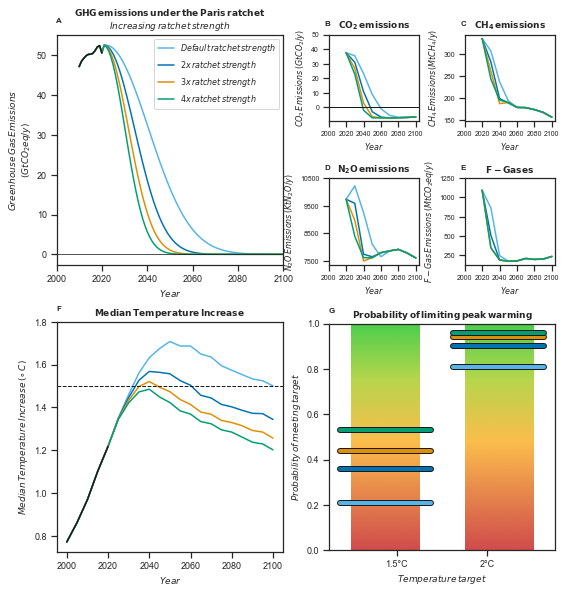

In [19]:
temp_plot('gr_%')

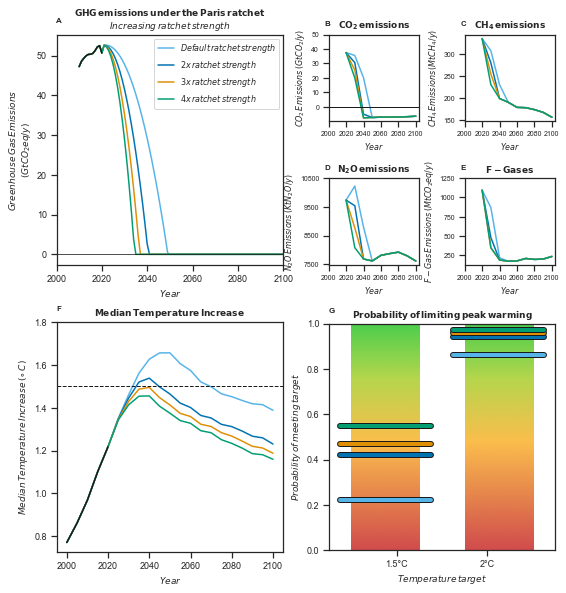

In [20]:
temp_plot('gr_abs')   

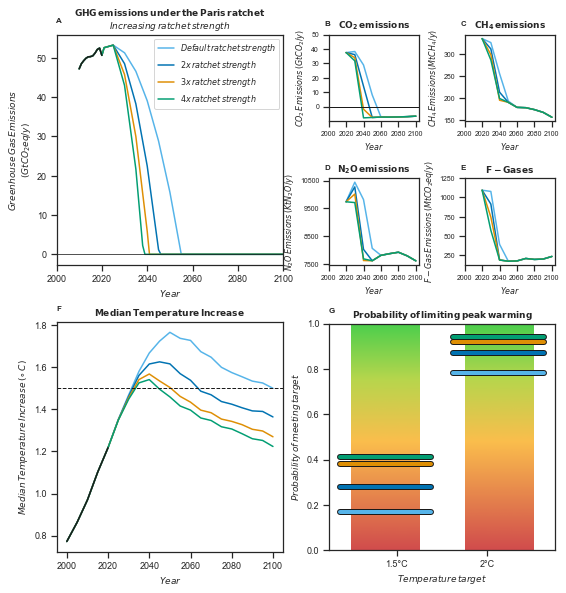

In [23]:
temp_plot('abs')